## Fit income distribution.

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
df_income = pd.read_csv('statistics_CBS/Verdeling van gestandaardiseerd inkomen, 2020 (x 1 000 huishoudens).csv', 
                        delimiter=';')
df_income.head()

,Inkomensgroep,Alle huishoudens
0,tussen -6 en -4 dzd euro,1.0
1,tussen -4 en -2 dzd euro,2.0
2,tussen -2 en 0 dzd euro,33.0
3,tussen 0 en 2 dzd euro,46.0
4,tussen 2 en 4 dzd euro,52.0


In [3]:
# income_range_l = np.arange(0, 50000, 10000)
# income_range_l = np.append(income_range_l, [50000, 100000, 200001])
# income_range_u = np.arange(10000, 60000, 10000)
# income_range_u = np.append(income_range_u, [100000, 200000, 300000])
income_range_l = np.arange(-6000, int(1e5), 2000)
income_range_u = np.arange(-4000, int(1e5)+2000, 2000)
print(income_range_u)
print(income_range_l)

[ -4000  -2000      0   2000   4000   6000   8000  10000  12000  14000
  16000  18000  20000  22000  24000  26000  28000  30000  32000  34000
  36000  38000  40000  42000  44000  46000  48000  50000  52000  54000
  56000  58000  60000  62000  64000  66000  68000  70000  72000  74000
  76000  78000  80000  82000  84000  86000  88000  90000  92000  94000
  96000  98000 100000]
[-6000 -4000 -2000     0  2000  4000  6000  8000 10000 12000 14000 16000
 18000 20000 22000 24000 26000 28000 30000 32000 34000 36000 38000 40000
 42000 44000 46000 48000 50000 52000 54000 56000 58000 60000 62000 64000
 66000 68000 70000 72000 74000 76000 78000 80000 82000 84000 86000 88000
 90000 92000 94000 96000 98000]


In [4]:
incomes = df_income['Alle huishoudens'].to_numpy()[:-1]
print(incomes)
incomes_norm = incomes / sum(incomes)

[  1.   2.  33.  46.  52.  56.  59.  66.  84. 179. 368. 425. 462. 539.
 495. 464. 467. 460. 441. 417. 388. 348. 303. 261. 223. 188. 158. 132.
 110.  90.  75.  62.  52.  43.  36.  31.  26.  22.  19.  17.  15.  13.
  11.  10.   9.   8.   7.   7.   6.   5.   5.   4.   4.]


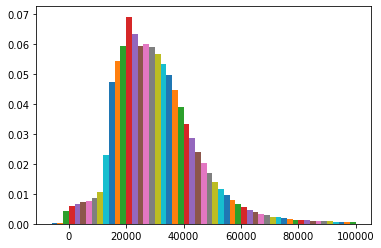

In [5]:
for i,(u,l) in enumerate(zip(income_range_l, income_range_u)):
    plt.bar(x=(u+l)/2, height=incomes_norm[i], width=l-u)

plt.show()

In [6]:
# income_range_l_full = np.arange(0, 300000, 10000)
# income_range_u_full = np.arange(10000, 310000, 10000)

In [7]:
# incomes_norm_full = np.insert(incomes_norm, 5, [incomes_norm[5] for _ in range(4)])
# incomes_norm_full = np.insert(incomes_norm_full, 10, [incomes_norm[6] for _ in range(9)])
# incomes_norm_full = np.insert(incomes_norm_full, 21, [incomes_norm[7] for _ in range(9)])

In [8]:
# for i,(u,l) in enumerate(zip(income_range_l_full, income_range_u_full)):
#     plt.bar(x=(u+l)/2, height=incomes_norm_full[i], width=l-u)
# plt.show()

In [9]:
n_in_sample = 1e5

sample_full = []
sample = []

# Filter out all incomes below 10000, as these are below the level of the bijstandsuitkering.

for frac, l, u in zip(incomes_norm, income_range_l, income_range_u):
    for _ in range(int(n_in_sample * frac)):
            sample_full.append((l + u) / 2)
    if l > 10000:
        for _ in range(int(n_in_sample * frac)):
            sample.append((l + u) / 2)



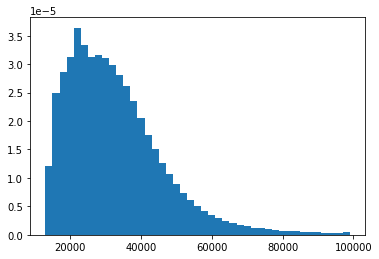

In [10]:
plt.hist(sample, bins=43, density=True)
plt.show()

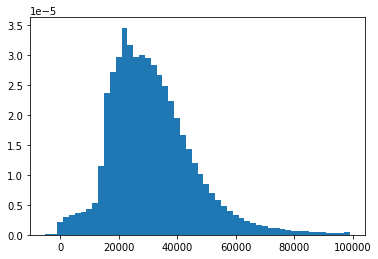

In [11]:
plt.hist(sample_full, bins=52, density=True)
plt.show()

In [12]:
# Fit the lognormal distribution
sigma, loc, scale = stats.lognorm.fit(sample, floc=0)

In [13]:
print(f"sigma: {sigma}, loc: {loc}, scale: {scale}")

sigma: 0.40578845823109533, loc: 0.0, scale: 29191.575232030875


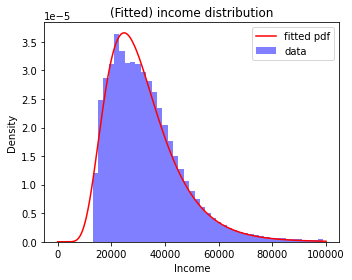

In [14]:
plt.figure(figsize=(5,4))

x = np.linspace(0, int(1e5), int(1e4))
dist = stats.lognorm(s=sigma, loc=loc, scale=scale)

plt.plot(x, dist.pdf(x), color='red', label='fitted pdf')
plt.hist(sample, bins=43, density=True, color='blue', alpha=.5, label='data')
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('(Fitted) income distribution')
plt.legend()
plt.tight_layout()
plt.show()

### Skill distribution now follows the fitted income distribution

In [15]:
# hh_incomes = np.array([])
# while len(hh_incomes) < 2500:
#     s = dist.rvs()
#     if s < 2e5:
#         # hh_incomes.append(s)
#         hh_incomes = np.append(hh_incomes, s)
hh_incomes = dist.rvs(size=2500)

In [16]:
hh_skills = 2500 * hh_incomes / sum(hh_incomes)

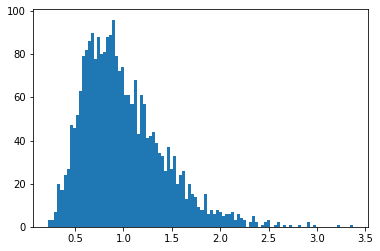

In [17]:
plt.hist(hh_skills, bins=100)
plt.show()

In [18]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

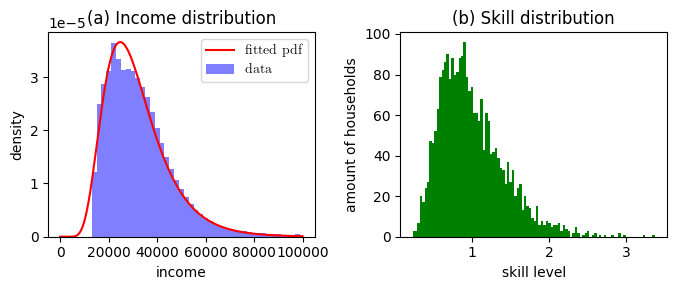

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

x = np.linspace(0, 1e5, int(1e4))
dist = stats.lognorm(s=sigma, loc=loc, scale=scale)

ax[0].plot(x, dist.pdf(x), color='red', label=r'fitted pdf')
ax[0].hist(sample, bins=43, density=True, color='blue', alpha=.5, label='data')
ax[0].set_xlabel('income')
ax[0].set_ylabel('density')
ax[0].set_title('(a) Income distribution')
ax[0].legend()

ax[1].hist(hh_skills, bins=100, color='green')
ax[1].set_title('(b) Skill distribution')
ax[1].set_xlabel('skill level')
ax[1].set_ylabel('amount of households')

plt.tight_layout()
# plt.show()
plt.savefig('../plotting/plots/income_skill.pdf')

## Income to Consumption

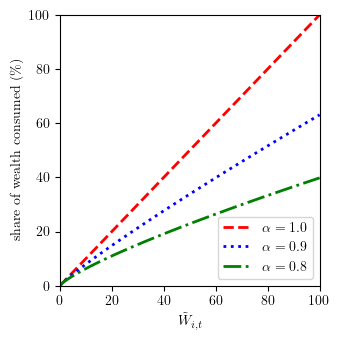

In [22]:
alphas = np.array([1.0, 0.9, 0.8])
xrange = np.linspace(0, 100, 100)
styles = ['dashed', 'dotted', 'dashdot']
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(figsize=(3.5, 3.5))
# axins = zoomed_inset_axes(ax, 2, loc=1)

for i, alpha in enumerate(alphas):
    C = np.minimum(xrange**alpha, xrange)
    plt.plot(xrange, C, 
             label=f'$\\alpha = {alpha}$', linestyle=styles[i], 
             color=colors[i], linewidth=2)
    # axins.plot(xrange, C, linestyle=styles[i], 
            #    color=colors[i], linewidth=2)

# axins.set_xlim(0, 1.5)
# axins.set_ylim(0, 1.5)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.xlabel('$\\tilde{W}_{i,t}$')
plt.ylabel('share of wealth consumed (\%)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('../plotting/plots/C_example.pdf')
plt.show()
